## Table of contents

### 01. Import Data and Libraries

### 02. Data Security

### 05. Customer profile

#### 05.1 Age groups

#### 05.2 Income level

#### 05.3 Family status with/without dependants

### 06. Visualization to show the distribution of profiles

### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### 08.1 Customer profiles by regions

### 08.2 Customer profiles by departments. 

### 01. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [3]:
# Import Data
ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs_merged_s.pkl'))

In [4]:
# Checking the output
ords_prods.shape

(32404859, 33)

### 02. Data Security

#### The dataset includes the first_name and the last_name that is PII.

In [5]:
# Addressing PII data 
ords_prods_sec = ords_prods.drop(columns = ['first_name', 'last_name'])

In [6]:
# Checking the output
ords_prods_sec.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_flag,median_days_since_prior_order,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
ords_prods_sec.shape

(32404859, 31)

In [8]:
# Exporting the dataset
ords_prods_sec.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_security.pkl'))

### 05. Customer profile

In [9]:
# Dataset statistics
ords_prods_sec.describe()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price_spent,median_days_since_prior_order,age,dependants_#,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,30328763.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404854.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.0,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,15.0,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,13.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [10]:
#Disable scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
#Checking the output
ords_prods_sec.describe()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price_spent,median_days_since_prior_order,age,dependants_#,income
count,32404859.000,32404859.000,32404859.000,32404859.000,32404859.000,30328763.000,32404859.000,32404859.000,32404859.000,32404859.000,32404859.000,32399732.000,32404859.000,32404859.000,32404854.000,32404859.000,32404859.000,32404859.000
mean,1710745.497,102937.229,17.142,2.739,13.425,NaN,25598.662,8.353,0.590,71.196,9.920,7.791,33.052,11.980,NaN,49.465,1.502,99437.733
std,987298.834,59466.104,17.535,2.090,4.246,0.000,14083.996,7.127,0.492,38.211,6.281,4.242,25.155,83.242,0.000,18.486,1.119,43057.273
min,2.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,18.000,0.000,25903.000
25%,855947.000,51422.000,5.000,1.000,10.000,5.000,13544.000,3.000,0.000,31.000,4.000,4.200,13.000,7.387,6.000,33.000,1.000,67004.000
50%,1711049.000,102616.000,11.000,3.000,13.000,8.000,25302.000,6.000,1.000,83.000,9.000,7.400,26.000,7.825,8.000,49.000,2.000,96618.000
75%,2565499.000,154389.000,24.000,5.000,16.000,15.000,37947.000,11.000,1.000,107.000,16.000,11.300,47.000,8.254,13.000,65.000,3.000,127912.000
max,3421083.000,206209.000,99.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,99.000,25005.425,30.000,81.000,3.000,593901.000


#### 05.1 Age groups

In [12]:
# Conditions for 'Age group'
age_group = []
  
for value in ords_prods_sec ['age']:
  if (value > 18) & (value <= 35 ):
    age_group.append ('Young')
  elif (value >= 36) &  (value <= 55):
    age_group.append ('Middle-aged')
  elif (value >= 56) & (value <= 70):
     age_group.append ('Older')
  else:
     age_group.append ('Seniors')

In [13]:
# Creating a new column
ords_prods_sec['age_group']=age_group

In [14]:
# Checking the output
ords_prods_sec['age_group'].value_counts(dropna = False)

Middle-aged    10166280
Young           8645945
Older           7513990
Seniors         6078644
Name: age_group, dtype: int64

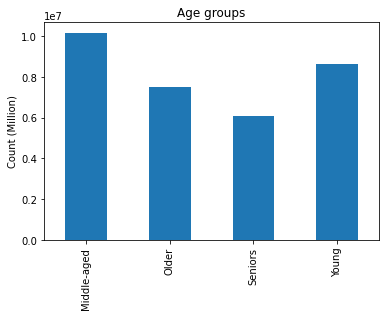

In [15]:
# Creating age group bar chart
bar_age_group = ords_prods_sec['age_group'].value_counts().sort_index().plot.bar(ylabel = 'Count (Million)', title = 'Age groups')

In [16]:
# Export visualization Age groups
bar_age_group = bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group.png'))

In [17]:
#Checking ordering depends on day of the week by age group
crosstab_dow_order = pd.crosstab(ords_prods_sec['age_group'], ords_prods_sec['order_day_of_week'], dropna = False )

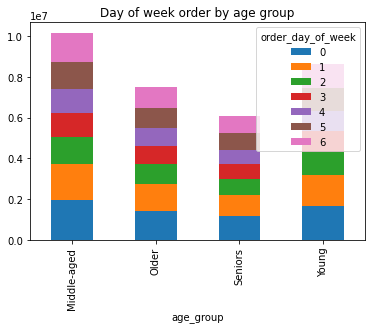

In [18]:
# Visualization Day of week order by age group
crosstab_dow_order = crosstab_dow_order.plot(kind = 'bar', stacked = True, title = 'Day of week order by age group')

In [19]:
#Checking loyalty by age group
crosstab_loyalty = pd.crosstab(ords_prods_sec['age_group'], ords_prods_sec['loyalty_flag'], dropna = False )

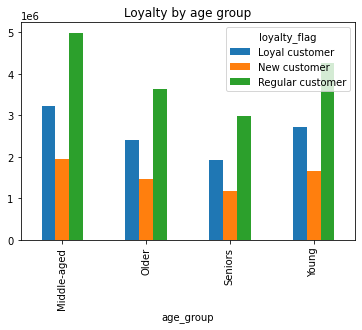

In [20]:
# Visualization loyalty by age group
crosstab_loyalty = crosstab_loyalty.plot(kind = 'bar', stacked = False, title = 'Loyalty by age group')

In [21]:
# Export visualizations Order in DOW and Loyalty be age group
crosstab_dow_order = crosstab_dow_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'DOW_age_group.png'))
crosstab_loyalty = crosstab_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_age_group.png'))


In [23]:
# Exporting the dataset
ords_prods_sec.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_security_agegroup.pkl'))

#### 05.2 Income level

In [24]:
# Conditions for 'Income level'
income_level = []
  
for value in ords_prods_sec ['income']:
  if (value <= 39999 ):
    income_level.append ('Low')
  elif (value >= 40000) &  (value <= 119999):
    income_level.append ('Middle')
  elif (value >= 120000) & (value <= 199999):
     income_level.append ('Affluent')
  else:
     income_level.append ('High')

In [25]:
# Creating a new column
ords_prods_sec['income_level']=income_level

In [26]:
# Checking the output
ords_prods_sec['income_level'].value_counts(dropna = False)

Middle      21106291
Affluent     9312927
Low          1727198
High          258443
Name: income_level, dtype: int64

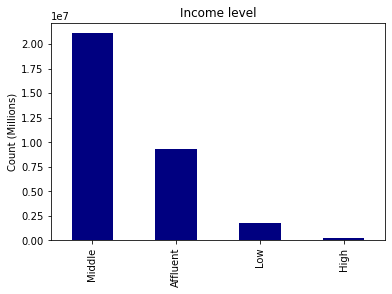

In [27]:
# income level visualization
bar_income = ords_prods_sec['income_level'].value_counts().plot.bar(ylabel = 'Count (Millions)', title = 'Income level', color = 'navy')

In [28]:
# Checking customer profile income level by age group
ct_income_age = pd.crosstab(ords_prods_sec['income_level'], ords_prods_sec['age_group'], dropna = False)

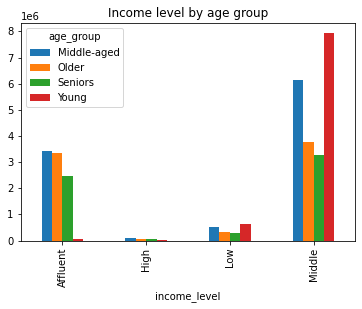

In [29]:
# Visualization income level by age group
bar_ct_income_age = ct_income_age.plot(kind = 'bar', stacked = False, title = 'Income level by age group')

In [30]:
# Export visualizations Order in DOW and Loyalty be age group
bar_income = bar_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_level.png'))
bar_ct_income_age = bar_ct_income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_age.png'))


In [31]:
# Exporting the dataset
ords_prods_sec.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_sec_age_income.pkl'))

#### 05.3 Family status with/without dependants

In [32]:
# Checking the family status
ords_prods_sec['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [33]:
#Checking age group
ords_prods_sec['age_group'].value_counts(dropna=False)

Middle-aged    10166280
Young           8645945
Older           7513990
Seniors         6078644
Name: age_group, dtype: int64

In [34]:
#Checking # of dependants
ords_prods_sec['dependants_#'].value_counts(dropna=False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: dependants_#, dtype: int64

In [35]:
ords_prods_sec.head()

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender_identity,state,age,date_joined,dependants_#,marital_status,income,age_group,income_level
0,2539329,1,1,2,8,NaN,196.000,1.000,0.000,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle
1,2398795,1,2,3,7,15.000,196.000,1.000,1.000,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle
2,473747,1,3,3,12,21.000,196.000,1.000,1.000,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle
3,2254736,1,4,4,7,29.000,196.000,1.000,1.000,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle
4,431534,1,5,4,15,28.000,196.000,1.000,1.000,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Young,Middle


In [36]:
# Young without/with dependants
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Young') & (ords_prods_sec['dependants_#'] == 0), 'profile'] = "Young single"
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Young') & (ords_prods_sec['dependants_#'] >= 1), 'profile'] = "Single parent"

In [38]:
# Middle-aged without/with dependants
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Middle-aged') & (ords_prods_sec['dependants_#'] == 0), 'profile'] = "Middle-aged single"
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Middle-aged') & (ords_prods_sec['dependants_#'] >= 1), 'profile'] = "Middle-aged parent"

In [39]:
# Older without/with dependants
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Older') & (ords_prods_sec['dependants_#'] == 0), 'profile'] = "Older single"
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Older') & (ords_prods_sec['dependants_#'] >= 1), 'profile'] = "Older with dependant"

In [40]:
# Seniors without/with dependants
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Seniors') & (ords_prods_sec['dependants_#'] == 0), 'profile'] = "Senior single"
ords_prods_sec.loc[(ords_prods_sec['age_group'] == 'Seniors') & (ords_prods_sec['dependants_#'] >= 1), 'profile'] = "Senior with dependant"

In [41]:
# Checking the output
ords_prods_sec['profile'].value_counts(dropna = False)

Middle-aged parent       7639491
Single parent            6495039
Older with dependant     5606265
Senior with dependant    4566561
Middle-aged single       2526789
Young single             2150906
Older single             1907725
Senior single            1512083
Name: profile, dtype: int64

In [48]:
#Exploring income level by family status
ct_fs_dep = pd.crosstab(ords_prods_sec['income_level'], ords_prods_sec['profile'], dropna = False )

In [49]:
# Checking the output
ct_fs_dep.head()

profile,Middle-aged parent,Middle-aged single,Older single,Older with dependant,Senior single,Senior with dependant,Single parent,Young single
income_level,,,,,,,,
Affluent,2565276,855207,863491,2484286,620444,1854868,55249,14106
High,69359,25839,16066,58347,13692,44242,20964,9934
Low,377807,130791,85473,237094,63410,207675,469055,155893
Middle,4627049,1514952,942695,2826538,814537,2459776,5949771,1970973


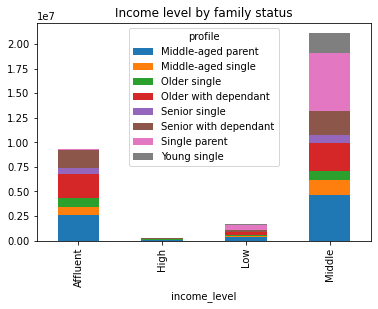

In [50]:
# Visualization income level by family status
bar_ct_fs_dep = ct_fs_dep.plot(kind = 'bar', stacked = True, title = 'Income level by family status')

In [52]:
# Export visualizations Income level by family status
bar_ct_fs_dep = bar_ct_fs_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_family.png'))

In [53]:
# Exporting the dataset
ords_prods_sec.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_sec_age_income_depend.pkl'))

### 06. Visualization to show the distribution of profiles

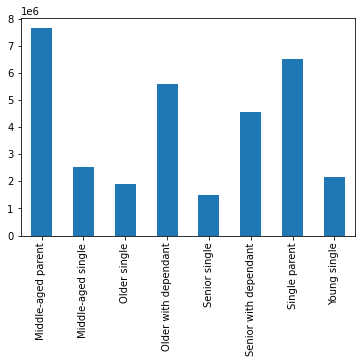

In [54]:
# Creating the bar chart
bar_profile = ords_prods_sec['profile'].value_counts().sort_index().plot.bar()

In [55]:
# Export visualization of the profile
bar_profile = bar_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile_family.png'))

### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [56]:
ords_prods_sec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   order_day_of_week              int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     float64 
 7   add_to_cart_order              float64 
 8   reordered                      float64 
 9   product_name                   object  
 10  aisle_id                       int32   
 11  department_id                  int32   
 12  prices                         float64 
 13  _merge                         category
 14  price_range_loc                object  
 15  busiest day                    object  
 16  busiest days                   object  
 17  busiest_period_of_day    

In [57]:
# Spending by customer profile
ords_prods_sec.groupby('profile').agg({'avg_price_spent': ['mean', 'min', 'max']})

avg_price_spent                
                                 mean   min       max
profile                                              
Middle-aged parent             11.550 1.100 11772.100
Middle-aged single             12.831 1.000 25005.425
Older single                   10.722 1.308  3074.905
Older with dependant           12.587 1.100  8703.400
Senior single                  12.638 1.200 14042.512
Senior with dependant          11.397 1.000  7414.485
Single parent                  12.186 1.000 12506.925
Young single                   12.195 1.000  8794.882

In [58]:
# Spending by income level
ords_prods_sec.groupby('income_level').agg({'avg_price_spent': ['mean', 'min', 'max']})

avg_price_spent                 
                        mean    min       max
income_level                                 
Affluent              13.401  7.000 15006.940
High                 264.710 24.103 25005.425
Low                    6.495  1.000     7.000
Middle                 8.708  1.000 12506.925

In [59]:
# Order number by customer profile
ords_prods_sec.groupby('profile').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                              mean min max
profile                                   
Middle-aged parent          17.156   1  99
Middle-aged single          17.176   1  99
Older single                17.700   1  99
Older with dependant        16.992   1  99
Senior single               17.155   1  99
Senior with dependant       17.108   1  99
Single parent               17.127   1  99
Young single                17.060   1  99

In [60]:
# Order number by income level
ords_prods_sec.groupby('income_level').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                     mean min max
income_level                     
Affluent           17.238   1  99
High               19.731   1  99
Low                15.705   1  99
Middle             17.186   1  99

### 08.1 Customer profiles by regions

In [61]:
# Conditions for 'Region'
result_region = []

for value in ords_prods_sec['state']:
 
  if (value in ['Maine', 'New Hampshire', 'Vermont','Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    result_region.append ('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
    result_region.append ('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama']):
    result_region.append ('South') 
  else: result_region.append ('West')

In [62]:
# Creating a new column
ords_prods_sec['region']=result_region

In [63]:
# Checking the output
ords_prods_sec['region'].value_counts(dropna = False)

West         10858672
South         8226126
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [64]:
# Customer profile by regions
ct_region_profile= pd.crosstab(ords_prods_sec['region'], ords_prods_sec['profile'], dropna = False )

In [65]:
#Checking the output
ct_region_profile.head()

profile,Middle-aged parent,Middle-aged single,Older single,Older with dependant,Senior single,Senior with dependant,Single parent,Young single
region,,,,,,,,
Midwest,1814043,619525,444203,1316483,351593,1045808,1515791,489879
Northeast,1344541,415237,334167,1012119,275601,802268,1145507,393296
South,1920210,633277,490541,1431464,373882,1165612,1659943,551197
West,2560697,858750,638814,1846199,511007,1552873,2173798,716534


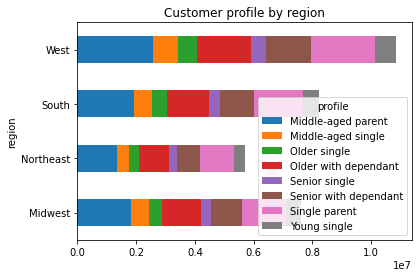

In [73]:
# Visualization customer profile by region
bar_region_profile=ct_region_profile.plot(kind = 'barh', stacked = True, title = 'Customer profile by region')

In [74]:
# Export visualization
bar_region_profile = bar_region_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile_region.png'))


### 08.2 Customer profiles by departments. 

In [75]:
# Customer profile by departments
ct_dep_profile = pd.crosstab(ords_prods_sec['department_id'], ords_prods_sec['profile'], dropna = False)

In [76]:
#Checking the output
ct_dep_profile.head()

profile,Middle-aged parent,Middle-aged single,Older single,Older with dependant,Senior single,Senior with dependant,Single parent,Young single
department_id,,,,,,,,
1,526088,173170,132108,388723,106153,314210,448562,145729
2,8483,2945,2099,6318,1644,4995,7320,2487
3,275749,91720,68399,202179,55300,165590,234505,78986
4,2235316,742284,561908,1642677,441849,1331404,1894449,629404
5,34755,13117,8357,26926,7439,21409,31488,10205


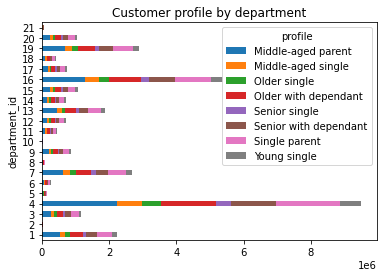

In [77]:
# Visualization customer profile by departments
bar_dep_profile=ct_dep_profile.plot(kind = 'barh', stacked = True, title = 'Customer profile by department')

In [78]:
# Export visualization
bar_dep_profile = bar_dep_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profile_dep.png'))
